In [24]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import scipy as sc
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

# 1. Calculo de probabilidad


1. Se reparten cartas, una a la vez, de una baraja de 52 cartas.

    a) Si las primeras 2 cartas son espadas, ¿cúal es la probabilidad de que las siguientes 3 cartas también
sean espadas?

    b) Si las primeras 3 cartas son todas de espadas, ¿cúal es la probabilidad de que las 2 cartas siguientes
sean también espadas?

    c) Si las primeras 4 cartas son todas de espadas, ¿cúal es la probabilidad de que la siguiente carta sea
también una espada?

In [25]:
def GetSamplecartas(N = int(1e4), ncartas = 0):
    
    Sample = np.zeros((N,ncartas))
    Events = [0] * (13-(5-ncartas)) + [1] * 39
    
    
    for i in range(N):
        np.random.shuffle(Events)
        cartas_tomo = Events[:ncartas]
            
       # print(Exp)
        Sample[i] = cartas_tomo
        
    return Sample

In [26]:
def prob_muestreo(N = int(1e4), ncartas = 0):
    total = GetSamplecartas(N, ncartas)
    Frecuenciascartas = np.array([],dtype=np.int64)

    for i in range(total.shape[0]):
        
        NEspadas = 0
        
        for j in range(total.shape[1]):
            
            if total[i,j] == 0:
                NEspadas += 1
                
        Frecuenciascartas = np.append(Frecuenciascartas,NEspadas)
    
    ii = np.where( Frecuenciascartas == ncartas )
    Eventsc = len(Frecuenciascartas[ii])

    return Eventsc/N

In [27]:
N = 10000

In [28]:
espadas_iniciales = 2
n = 3
teo = 0.0084
muestreo = prob_muestreo(N, n)
print('La probabilidad de que las siguientes 3 cartas también sean espadas si las dos primeras son espadas por medio de muestreo aleatorio es ' + str(muestreo) + ' mientras que el teorico es ' + str(teo) + '.')

La probabilidad de que las siguientes 3 cartas también sean espadas si las dos primeras son espadas por medio de muestreo aleatorio es 0.0089 mientras que el teorico es 0.0084.


In [29]:
espadas_iniciales = 3
n = 2
teo = 0.0383
muestreo = prob_muestreo(N, n)
print('La probabilidad de que las siguientes 2 cartas también sean espadas si las tres primeras son espadas por medio de muestreo aleatorio es ' + str(muestreo) + ' mientras que el teorico es ' + str(teo))

La probabilidad de que las siguientes 2 cartas también sean espadas si las tres primeras son espadas por medio de muestreo aleatorio es 0.0363 mientras que el teorico es 0.0383


In [30]:
espadas_iniciales = 4
n = 1
teo = 0.1875
muestreo = prob_muestreo(N, n)
print('La probabilidad de que las siguientes 2 cartas también sean espadas si las tres primeras son espadas por medio de muestreo aleatorio es ' + str(muestreo) + ' mientras que el teorico es ' + str(teo))

La probabilidad de que las siguientes 2 cartas también sean espadas si las tres primeras son espadas por medio de muestreo aleatorio es 0.1886 mientras que el teorico es 0.1875


2. Suponga que la probabilidad de exposición a la gripe durante una epidemia es .6. La experiencia ha demostrado que un suero tiene 80 % de éxito para prevenir que una persona inoculada contraiga la gripe si se expone a ella. Una persona no inoculada enfrenta una probabilidad de ,90 de contraer la gripe si se expone a ella. Dos personas, una inoculada y otra no, realizan un trabajo altamente especializado en un negocio. Suponga que no están en el mismo lugar, no están en contacto con las mismas personas y no pueden contagiarse entre sí a la gripe. ¿Cuál es la probabilidad de que al menos una de ellas se enferme?

In [31]:
def proba_epidemia(N):
    Probabilidad_vacunado = [1] * 2 + [0] * 8
    Probabilidad_Nvacunado = [1] * 9 + [0] * 1
    Expuso = [1] * 6 + [0] * 4
    Exito = 0

    for i in range(N):
        Exp_vacunado = np.random.choice(Expuso,1)
        vacunado = False
        if Exp_vacunado == 1:
            enfermo = np.random.choice(Probabilidad_vacunado, 1)
            if enfermo == 1:
                Exito += 1
                vacunado = True
        Exp_Nvacunado = np.random.choice(Expuso,1)
        if Exp_Nvacunado == 1 and vacunado == False:
            enfermoN = np.random.choice(Probabilidad_Nvacunado, 1)
            if enfermoN == 1:
                Exito += 1
    
    return Exito/N

        

In [32]:
result = proba_epidemia(N)
teo = 0.5952
print('La probabilidad de que al menos una persona se enferme por medio de muestreo aleatorio es ' + str(result) + ' mientras que el teorico es ' + str(teo))

La probabilidad de que al menos una persona se enferme por medio de muestreo aleatorio es 0.5997 mientras que el teorico es 0.5952


# 2. Distribuciones de probabilidad discretas

1. El muestreo de piezas defectuosas de grandes lotes de productos manufacturados da un número de piezas defectuosas, Y , que sigue una distribución de probabilidad binomial. Un plan de muestreo consiste en especificar el número de piezas n por incluirse en una muestra y un número de aceptación a. El lote es aceptado si Y ≤ a y rechazado si Y > a. Denote con p la proporci´on de piezas defectuosas del lote. Un ingeniero de control de calidad desea estudiar planes de muestreo alternativos: n = 5, a = 1 y n = 25, a = 5. Construya las curvas características de operación para ambos planes, haciendo uso de probabilidades de aceptación en el rango p ∈ [0, 1].

    a) Si usted fuera un vendedor que produce lotes con una fracción defectuosa que va de p = 0ap = ,10, ¿cuál de los dos planes de muestreo preferiría?

    b) Si usted fuera un comprador que desea protegerse contra la aceptación de lotes con una fracción defectuosa que exceda de p = ,30, ¿cuál de los dos planes de muestreo preferiría?

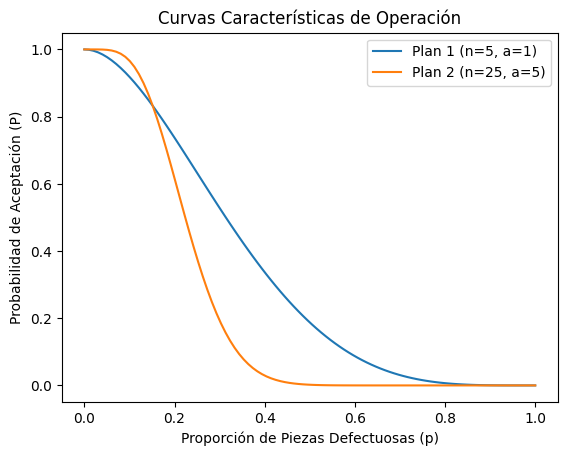

In [33]:
p = sym.Symbol('p',real=True)
def prob_aceptacion(p, n, a):
    result = 0
    for k in range(a + 1):
        result += (np.math.factorial(n)/(np.math.factorial(n-k)*np.math.factorial(k)))*(p**k)*((1-p)**(n-k))
    return result

p_values = np.linspace(0, 1, 100)

plan1 = prob_aceptacion(p_values, 5, 1)
plan2 = prob_aceptacion(p_values, 25, 5)

plt.plot(p_values, plan1, label='Plan 1 (n=5, a=1)')
plt.plot(p_values, plan2, label='Plan 2 (n=25, a=5)')

plt.title('Curvas Características de Operación')
plt.xlabel('Proporción de Piezas Defectuosas (p)')
plt.ylabel('Probabilidad de Aceptación (P)')
plt.legend()
plt.show()

a) Si usted fuera un vendedor que produce lotes con una fracción defectuosa que va de p = 0ap = ,10, ¿cuál de los dos planes de muestreo preferiría?
    
    Preferiría el segundo plan ya que en el intervalo 0 - 0.1 hay mas probabilidades de que el producto sea aceptado.

b) Si usted fuera un comprador que desea protegerse contra la aceptación de lotes con una fracción defectuosa que exceda de p = ,30, ¿cuál de los dos planes de muestreo preferiría?
    
    Preferiria el primer plan ya que a medida que la proporcion de piezas defectuosas aumenta, la probabilidad de aceptación se reduce gradualmente mientras que el segundo plan a partir de 0.3 descarta todos los lotes.

2. El número de desconexiones del servidor de una compañía sigue una distribución de Poisson con una
tasa de una desconexión cada 4 horas.

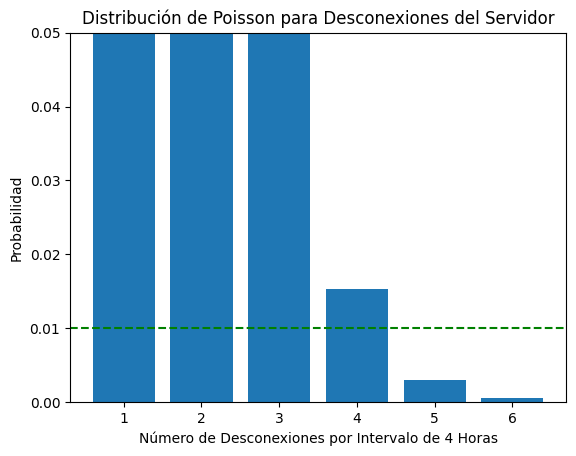

In [34]:
d = sym.Symbol('d',real=True)
def n_desconexiones(d):
    new = []
    for i in d:
        x = np.exp(-1)*(1**int(i))/(np.math.factorial(int(i)))
        new.append(x)
    return np.array(new)

d_values = np.arange(1, 7)

desconexiones_values = n_desconexiones(d_values)

plt.bar(d_values, desconexiones_values)
plt.ylim(0,0.05)
plt.axhline(y=0.01, color='g', linestyle='--')

plt.title('Distribución de Poisson para Desconexiones del Servidor')
plt.xlabel('Número de Desconexiones por Intervalo de 4 Horas')
plt.ylabel('Probabilidad')
plt.show()

a) Encuentre el menor valor de n tal que la probabilidad de que haya al menos n desconexiones en menos de un período de 4 horas es menor que 0.01.

    Según el grafico elaborado se puede observar que el menor valor de n es n = 5.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


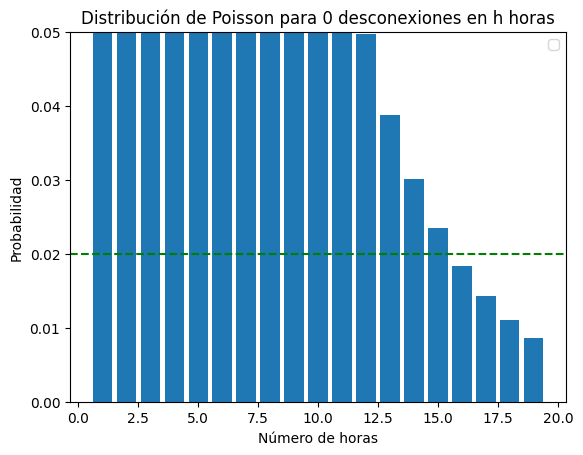

In [35]:
h = sym.Symbol('d',real=True)
def h_horas(h):
    new = []
    for i in h:
        x = np.exp(-1*(i/4))
        new.append(x)
    return np.array(new)

h_values = np.arange(1, 20)

horas_values = h_horas(h_values)

plt.bar(h_values, horas_values)
plt.ylim(0,0.05)
plt.axhline(y=0.02, color='g', linestyle='--')

plt.title('Distribución de Poisson para 0 desconexiones en h horas')
plt.xlabel('Número de horas')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

b) Encuentre el menor valor del número de horas h tal que la probabilidad de que no haya desconexiones en h horas sea menor que 0.02.
    
    Según el grafico realizado el menor valor de h para que la probabilidad sea menor a 0.02 es h = 16.

In [36]:
probabilidad_no = np.exp(-1)
probabilidad_si = 1 - probabilidad_no

probabilidad_total = (probabilidad_si**2)*probabilidad_no

probabilidad_total

0.14699594306608088

c) Encuentre la probabilidad de que en 3 períodos consecutivos de 4 horas, haya solamente un período de 4 horas sin desconexiones.
    
    La probabilidad de que en 3 periodos consecutivos haya solamente un periodo sin desconexiones es de 0.15

In [37]:
probabilidad_esperada = np.exp(-3)*(3**3)/(np.math.factorial(3))

probabilidad_esperada

0.22404180765538775

d) Encuentre la probabilidad de que el número de desconexiones en 3 períodos consecutivos de 4 horas sea igual al número esperaod de desconexiones en 3 períodos consecutivos de 4 horas.

    La probabilidad es de 0.22

# 3. Distribuciones de probabilidad continuas
1. Suponga que el error en la temperatura en un experimento controlado de laboratorio es una variable aleatoria continua X, que tiene la siguiente función de densidad de probabilidad:

    Encuentre las probabilidades:

    a) P(0 < X ≤ 1)
    
    b) P(1 < X ≤ 2)

In [38]:
def f(x):
    return (x**2) /3
print(sc.integrate.quad(f,0,1)[0])
print(sc.integrate.quad(f,1,2)[0])

0.11111111111111112
0.7777777777777778


a) P(0 < X ≤ 1) = 0.11
    
b) P(1 < X ≤ 2) = 0.77

2. Se supone que las calificaciones de un examen están normalmente distribuidas con media 78 y varianza de 36.

    a) ¿Cuál es la probabilidad de que una persona que haga el examen alcance calificaciones mayores de 72?

In [39]:
def z_score(miu, delta, x):
    o = delta**(1/2)
    return (x-miu)/(o)

z = z_score(78,36,72)
#probabilidad de sacar calificaciones < 72
probabilidad = sc.stats.norm.cdf(z)
print('La probabilidad de que una persona alcance calificaciones mayores de 72 es de: ', round(1-probabilidad,2)*100, '%')

La probabilidad de que una persona alcance calificaciones mayores de 72 es de:  84.0 %


b) Suponga que los estudiantes que alcancen el 10 % más alto de esta distribución reciben una calificación de A. ¿Cuál es la calificación mínima que un estudiante debe recibir para ganar una calificación de A?

In [40]:
probabilidad = 1 - 0.1
z = sc.stats.norm.ppf(probabilidad)
def inversa_z_score(miu, delta, z):
    o = delta**(1/2)
    return (z*o)+miu

x = inversa_z_score(78,36,z)
print('La calificación mínima para obtener una A es de: ', round(x,2))

La calificación mínima para obtener una A es de:  85.69


c) ¿Cuál debe ser el punto límite para pasar el examen si el examinador desea pasar a sólo 28,1 % más
alto de todas las calificaciones?


In [41]:
probabilidad = 1 - 0.281
z = sc.stats.norm.ppf(probabilidad)
x = inversa_z_score(78,36,z)
print('El punto límite es: ', round(x,2))

El punto límite es:  81.48


d) Aproximadamente qué proporción de estudiantes tienen calificaciones de 5 o más puntos arriba de la calificación que corta al 25 % más bajo?

In [42]:
probabilidad_1 = 0.25
z_1 = sc.stats.norm.ppf(probabilidad_1)
x_1 = inversa_z_score(78,36,z_1)
x_2 = x_1 + 5
z_2 = z_score(78,36,x_2)
probabilidad_2 = sc.stats.norm.cdf(z_2)

print('La proporción de estudiantes es de aproximadamente: ', round((1-probabilidad_2)*100,2), '%')

La proporción de estudiantes es de aproximadamente:  43.69 %


e) Si se sabe que la calificación de un estudiante excede de 72, ¿cuál es la probabilidad de que su calificación exceda de 84?

In [43]:
prob_1 = 0.8413
z = z_score(78,36,84)
probabilidad = sc.stats.norm.cdf(z)
prob_2 = 1-probabilidad
rest = prob_2 / prob_1

print('La probabilidad de que la calificación exceda de 84 sabiendo que es mayor a 72 es de: ', round(rest*100,2), '%')

La probabilidad de que la calificación exceda de 84 sabiendo que es mayor a 72 es de:  18.86 %


# 4. Cadenas de Markov

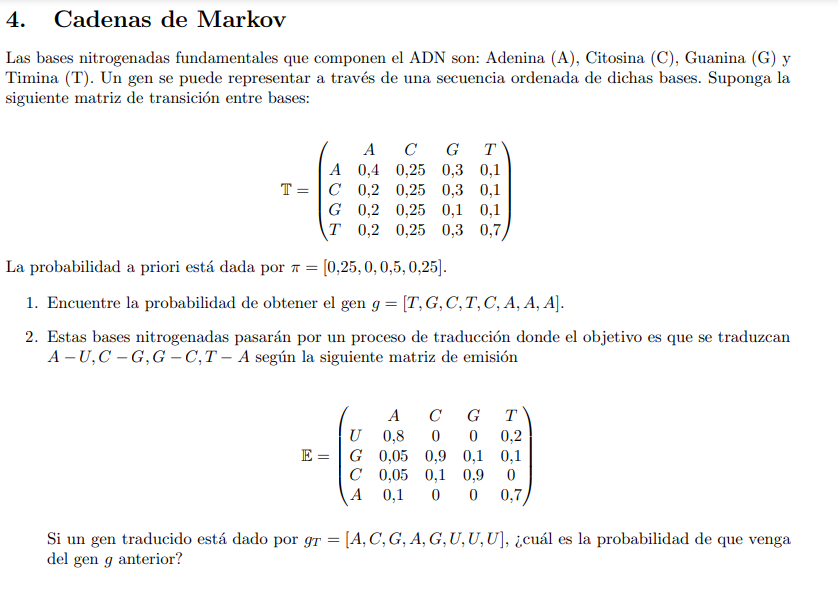

In [44]:
# primer punto
T=np.array([[0.4,0.25,0.3,0.1],[.2,.25,.3,.1],[.2,.25,.1,.1],[.2,.25,.3,.7]])
pi=np.array([0.25,0,0.5,0.25])
gen_g=[3,2,1,3,1,0,0,0]
probabilidad=pi[3]
for i in range(len(gen_g)):
    if i==0:
        pass
    else:
        probabilidad*=T[gen_g[i-1]][gen_g[i]]

probabilidad

1.5000000000000002e-05

In [45]:
#segundo punto
E=np.array([[0.8,0,0,.2],[.05,.9,.1,.1],[.05,.1,.9,0],[.1,0,0,.7]])
Obs=np.array([])

In [46]:
def GetStates(States,N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    print(CStates)
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
       # print(p)
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
                
    return np.array(Permu)

In [47]:
States = np.array([0,1,2,3])

In [57]:
def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0]]
    
    # Matriz de transicion
    for i in range(n-1):
        p *= T[ State[i+1], State[i]  ]
        
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
    return p
Probabilidad2=np.sum(GetProb(T,E,Obs,GetStates(States,4),pi))
Probabilidad2

[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 1), (0, 1, 1, 1), (1, 1, 1, 1)]


1.0